## i) Importing libraries and Images

### SImilarity detection: Kmeans and Colour detection

In [63]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

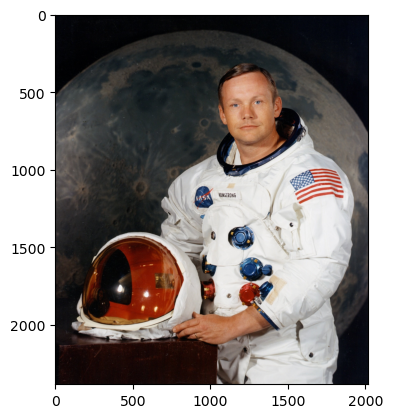

In [64]:
sample_image = cv2.imread('images/apolo.jpg')
image = cv2.cvtColor(sample_image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

## ii) Preprocessing the Image

In [65]:
#2d vector 
#reshape th umage (100,100,3)
# (width, heught, channels)
# convert to (10000,3) afer convert to float data type
twoDimension = image.reshape((-3,3))

In [66]:
twoDimension = np.float32(twoDimension)

In [67]:
twoDimension

array([[ 8.,  7., 12.],
       [15., 14., 19.],
       [ 7.,  6., 11.],
       ...,
       [16., 15., 21.],
       [21., 20., 25.],
       [21., 20., 25.]], dtype=float32)

In [68]:
len(twoDimension)

4804128

## iii) Defining Parameters

In [69]:
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 2
attempts = 10

## Applying K-means for image segmentation

In [70]:
ret,label,center = cv2.kmeans(twoDimension, K, None, criteria, attempts, cv2.KMEANS_PP_CENTERS)
center = np.uint8(center)

In [71]:
res = center[label.flatten()]
result_image = res.reshape((image.shape))

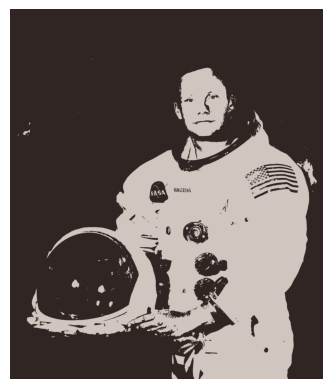

In [72]:
plt.axis('off')
plt.imshow(result_image)

## v) Image Segmentation Results for Different Values of K

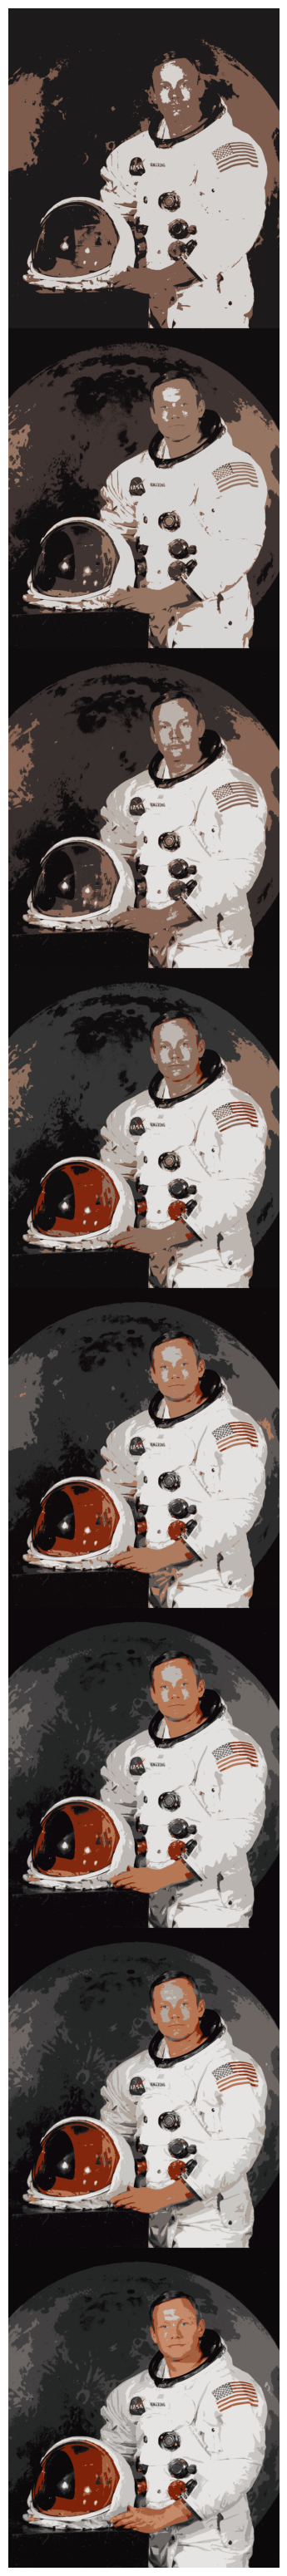

In [75]:
K = [3,4,5,6,7,8,9,10]
result = []
fig = plt.figure(figsize=(30,40))
for i in range(len(K)):
    ret,label,center = cv2.kmeans(twoDimension, K[i], None, criteria, attempts, cv2.KMEANS_PP_CENTERS)
    center = np.uint8(center)
    res = center[label.flatten()]
    result.append(res.reshape((image.shape)))
    final = np.concatenate((result), axis = 0)
plt.axis('off')
plt.imshow(final)